# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
28 * 28

784

Saving figure some_digit_plot


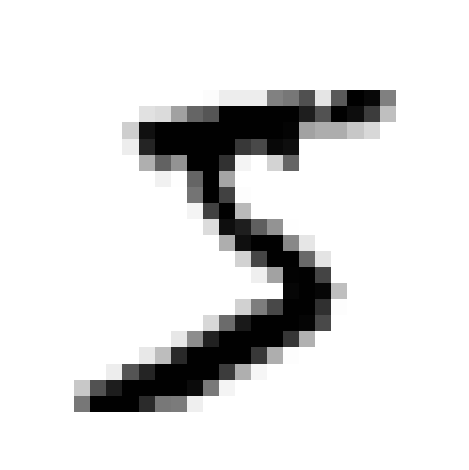

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [7]:
y[0]

'5'

In [8]:
y = y.astype(np.uint8)

In [9]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [10]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


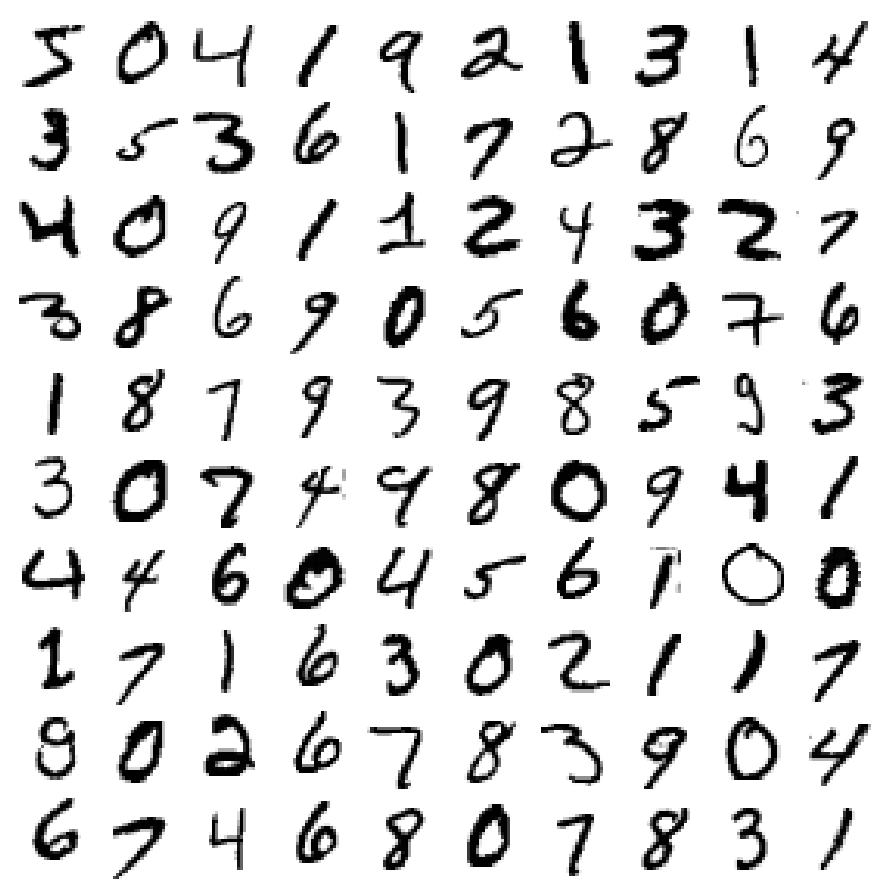

In [11]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [12]:
y[0]

5

In [13]:

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# grid search for classifiers

## KNN classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Define the parameter grid for n_neighbors and weights
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],  # Range of neighbors to test
    'weights': ['uniform', 'distance']  # Uniform or distance-based weights
}

# Step 2: Initialize the KNN classifier
knn_clf = KNeighborsClassifier()

# Step 3: Set up Grid Search with cross-validation
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', verbose=2)

# Step 4: Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters
print("Best hyperparameters:", grid_search.best_params_)

# Step 6: Evaluate the best model on the test set
best_knn_clf = grid_search.best_estimator_
y_pred = best_knn_clf.predict(X_test)

# Step 7: Check the accuracy of the best model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Best KNN Classifier Accuracy: {accuracy:.4f}")

# Display confusion matrix of the best model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best KNN Classifier")
plt.show()


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Best hyperparameters found by Grid Search (replace with actual best_params from your grid search)
best_params_knn = {
    'n_neighbors': 3, 
    'weights': 'distance',  
}

# Initialize KNN classifier with the best hyperparameters
best_knn_clf = KNeighborsClassifier(
    n_neighbors=best_params_knn['n_neighbors'],
    weights=best_params_knn['weights'],
)

# Train the model on the training set
best_knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = best_knn_clf.predict(X_test)

# Evaluate the accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy with Best Hyperparameters: {knn_accuracy:.4f}")

# Optional: Display a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Classifier Accuracy with Best Hyperparameters: 0.9717

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## SGD classifier classifier

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Ignore convergence warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Define the parameter grid for SGD
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization type
    'max_iter': [2000, 3000],  # Increased iterations for better convergence
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedule
    'eta0': [0.001, 0.0001]  # Lower learning rates for constant learning rate
}

# Initialize SGD classifier with early stopping and tolerance
sgd_clf = SGDClassifier(random_state=42, early_stopping=True, tol=1e-4)

# Set up Grid Search with cross-validation
grid_search_sgd = GridSearchCV(sgd_clf, param_grid_sgd, cv=5, scoring='accuracy', verbose=2)

# Fit the Grid Search model
grid_search_sgd.fit(X_train, y_train)

# Best parameters for SGD
print("Best hyperparameters for SGD:", grid_search_sgd.best_params_)

# Evaluate the best SGD model on the test set
best_sgd_clf = grid_search_sgd.best_estimator_
y_pred_sgd = best_sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
print(f"Best SGD Classifier Accuracy: {sgd_accuracy:.4f}")

# Optional: Display a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_sgd))


In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Best hyperparameters found by Grid Search (replace with actual best_params from your grid search)
best_params_sgd = {
    'alpha': 0.0001,  
    'penalty': 'l2',  
    'max_iter': 2000,  
    'learning_rate': 'optimal'  
}

# Initialize SGD classifier with the best hyperparameters
best_sgd_clf = SGDClassifier(
    alpha=best_params_sgd['alpha'],
    penalty=best_params_sgd['penalty'],
    max_iter=best_params_sgd['max_iter'],
    learning_rate=best_params_sgd['learning_rate'],
    random_state=42
)

# Train the model on the training set
best_sgd_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sgd = best_sgd_clf.predict(X_test)

# Evaluate the accuracy
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Accuracy with Best Hyperparameters: {sgd_accuracy:.4f}")

# Optional: Display a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_sgd))


SGD Classifier Accuracy with Best Hyperparameters: 0.8740

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.97      0.96      0.97      1135
           2       0.93      0.78      0.85      1032
           3       0.78      0.92      0.84      1010
           4       0.96      0.79      0.87       982
           5       0.86      0.79      0.83       892
           6       0.96      0.89      0.93       958
           7       0.93      0.89      0.91      1028
           8       0.65      0.90      0.75       974
           9       0.84      0.87      0.86      1009

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.88     10000



## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up Grid Search with cross-validation
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', verbose=2)

# Fit the Grid Search model
grid_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate the best Random Forest model on the test set
best_rf_clf = grid_search_rf.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Best Random Forest Classifier Accuracy: {rf_accuracy:.4f}")


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Best hyperparameters found by Grid Search
best_params_rf = {
    'bootstrap': False,
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 150
}

# Initialize Random Forest classifier with the best hyperparameters
best_rf_clf = RandomForestClassifier(
    bootstrap=best_params_rf['bootstrap'],
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators'],
    random_state=42
)

# Train the model on the training set
best_rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = best_rf_clf.predict(X_test)

# Evaluate the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy with Best Hyperparameters: {rf_accuracy:.4f}")

# Optional: Display a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy with Best Hyperparameters: 0.9739

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Results and analysis

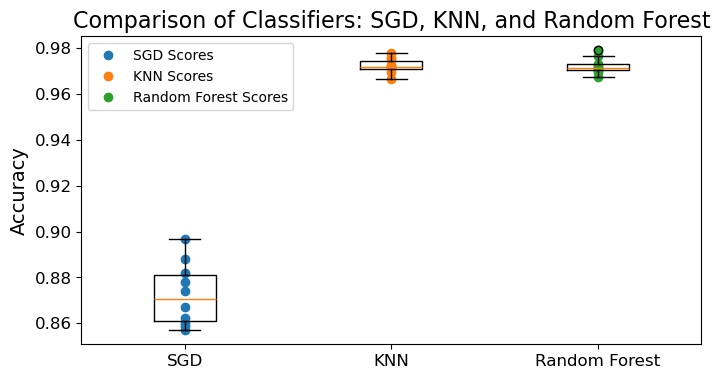

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

best_params_rf = {
    'bootstrap': False,
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 150
}
best_params_sgd = {
    'alpha': 0.0001,  
    'penalty': 'l2',  
    'max_iter': 2000,  
    'learning_rate': 'optimal'  
}

# Define and evaluate Random Forest Classifier
rf_clf = RandomForestClassifier( bootstrap=best_params_rf['bootstrap'],
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators'],
    random_state=42)
forest_scores = cross_val_score(rf_clf, X_train, y_train, cv=10)

# Define and evaluate K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10)

# Define and evaluate Stochastic Gradient Descent Classifier
sgd_clf = SGDClassifier( alpha=best_params_sgd['alpha'],
    penalty=best_params_sgd['penalty'],
    max_iter=best_params_sgd['max_iter'],
    learning_rate=best_params_sgd['learning_rate'],
    random_state=42)
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=10)

# Plotting the results
plt.figure(figsize=(8, 4))

# Scatter plot for individual scores
plt.plot([1] * 10, sgd_scores, "o", label='SGD Scores')
plt.plot([2] * 10, knn_scores, "o", label='KNN Scores')
plt.plot([3] * 10, forest_scores, "o", label='Random Forest Scores')

# Boxplot for comparison
plt.boxplot([sgd_scores, knn_scores, forest_scores], labels=["SGD", "KNN", "Random Forest"])

# Add labels and title
plt.ylabel("Accuracy", fontsize=14)
plt.title("Comparison of Classifiers: SGD, KNN, and Random Forest", fontsize=16)
plt.legend()
plt.show()


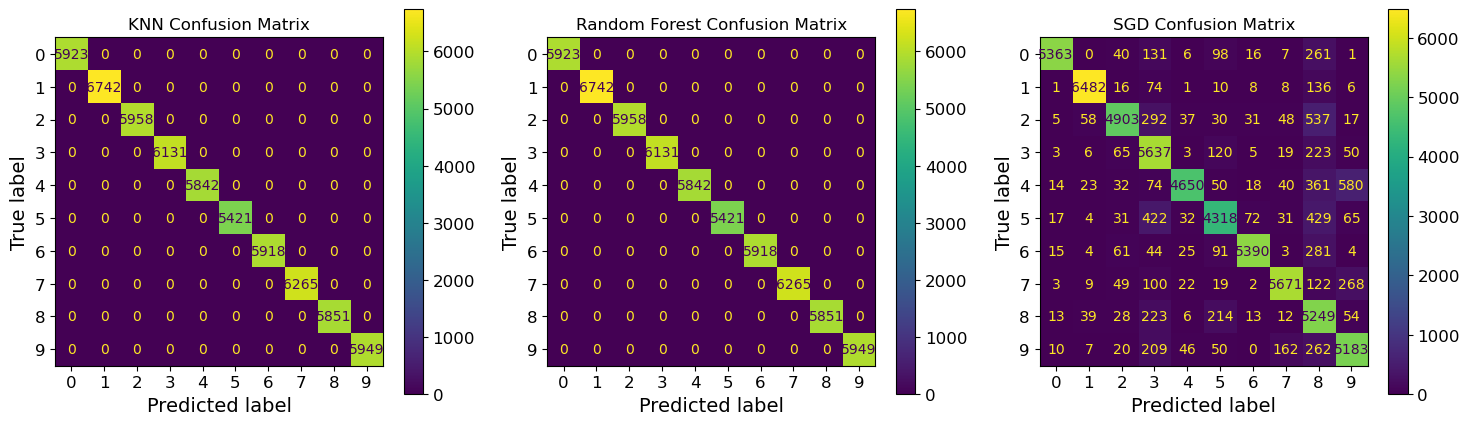

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit the models on the training data
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)

# Make predictions
knn_pred = knn_clf.predict(X_train)
forest_pred = rf_clf.predict(X_train)
sgd_pred = sgd_clf.predict(X_train)

# Create confusion matrices
knn_cm = confusion_matrix(y_train, knn_pred)
forest_cm = confusion_matrix(y_train, forest_pred)
sgd_cm = confusion_matrix(y_train, sgd_pred)

# Display confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# KNN Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=digits.target_names).plot(ax=axs[0])
axs[0].set_title('KNN Confusion Matrix')

# Random Forest Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=forest_cm, display_labels=digits.target_names).plot(ax=axs[1])
axs[1].set_title('Random Forest Confusion Matrix')

# SGD Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=sgd_cm, display_labels=digits.target_names).plot(ax=axs[2])
axs[2].set_title('SGD Confusion Matrix')

plt.show()


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curves for each classifier
plot_learning_curve(best_knn_clf, 'KNN Learning Curve', X_train, y_train)
plot_learning_curve(best_rf_clf, 'Random Forest Learning Curve', X_train, y_train)
plot_learning_curve(best_sgd_clf, 'SGD Learning Curve', X_train, y_train)
